In [323]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 200)

In [391]:
data = pd.read_csv("Spotify Most Streamed Songs.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [392]:
data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...


# Data cleaning

#**Merging the released_year, released_month, released_day columns to reduce dimentionality**

In [393]:
data = data.rename(columns = {'released_year': 'year',
                    'released_day': 'day',
                    'released_month': 'month'})
data['released_date'] = pd.to_datetime(data[['day', 'month', 'year']])
data = data.drop(columns=['day', 'year', 'month', 'key', 'cover_url'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            953 non-null    object        
 1   artist(s)_name        953 non-null    object        
 2   artist_count          953 non-null    int64         
 3   in_spotify_playlists  953 non-null    int64         
 4   in_spotify_charts     953 non-null    int64         
 5   streams               953 non-null    object        
 6   in_apple_playlists    953 non-null    int64         
 7   in_apple_charts       953 non-null    int64         
 8   in_deezer_playlists   953 non-null    object        
 9   in_deezer_charts      953 non-null    int64         
 10  in_shazam_charts      903 non-null    object        
 11  bpm                   953 non-null    int64         
 12  mode                  953 non-null    object        
 13  danceability_%      

In [394]:
import copy
df = data.copy(deep = True)
df['in_shazam_charts'] = (pd.to_numeric(df['in_shazam_charts'].
                                                      str.replace(',', '', regex=False),
                                                      errors='coerce').fillna(56)                                       )
#df['in_shazam_charts'].describe()
#df.info()

In [395]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['in_deezer_charts'] = pd.to_numeric(df['in_deezer_charts'], errors='coerce')
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'].astype(str).str.replace(
    ',', '', regex=False), errors='coerce')
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce')
#df['in_shazam_charts'].fillna(df['in_shazam_charts'].median(), inplace=True)
df.fillna({'in_shazam_charts': df['in_shazam_charts'].median()})
df.fillna({'in_deezer_playlists': df['in_deezer_playlists'].median()})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            953 non-null    object        
 1   artist(s)_name        953 non-null    object        
 2   artist_count          953 non-null    int64         
 3   in_spotify_playlists  953 non-null    int64         
 4   in_spotify_charts     953 non-null    int64         
 5   streams               952 non-null    float64       
 6   in_apple_playlists    953 non-null    int64         
 7   in_apple_charts       953 non-null    int64         
 8   in_deezer_playlists   874 non-null    float64       
 9   in_deezer_charts      953 non-null    int64         
 10  in_shazam_charts      953 non-null    float64       
 11  bpm                   953 non-null    int64         
 12  mode                  953 non-null    object        
 13  danceability_%      

# EDA

#**Summary Statistics and Visualization**

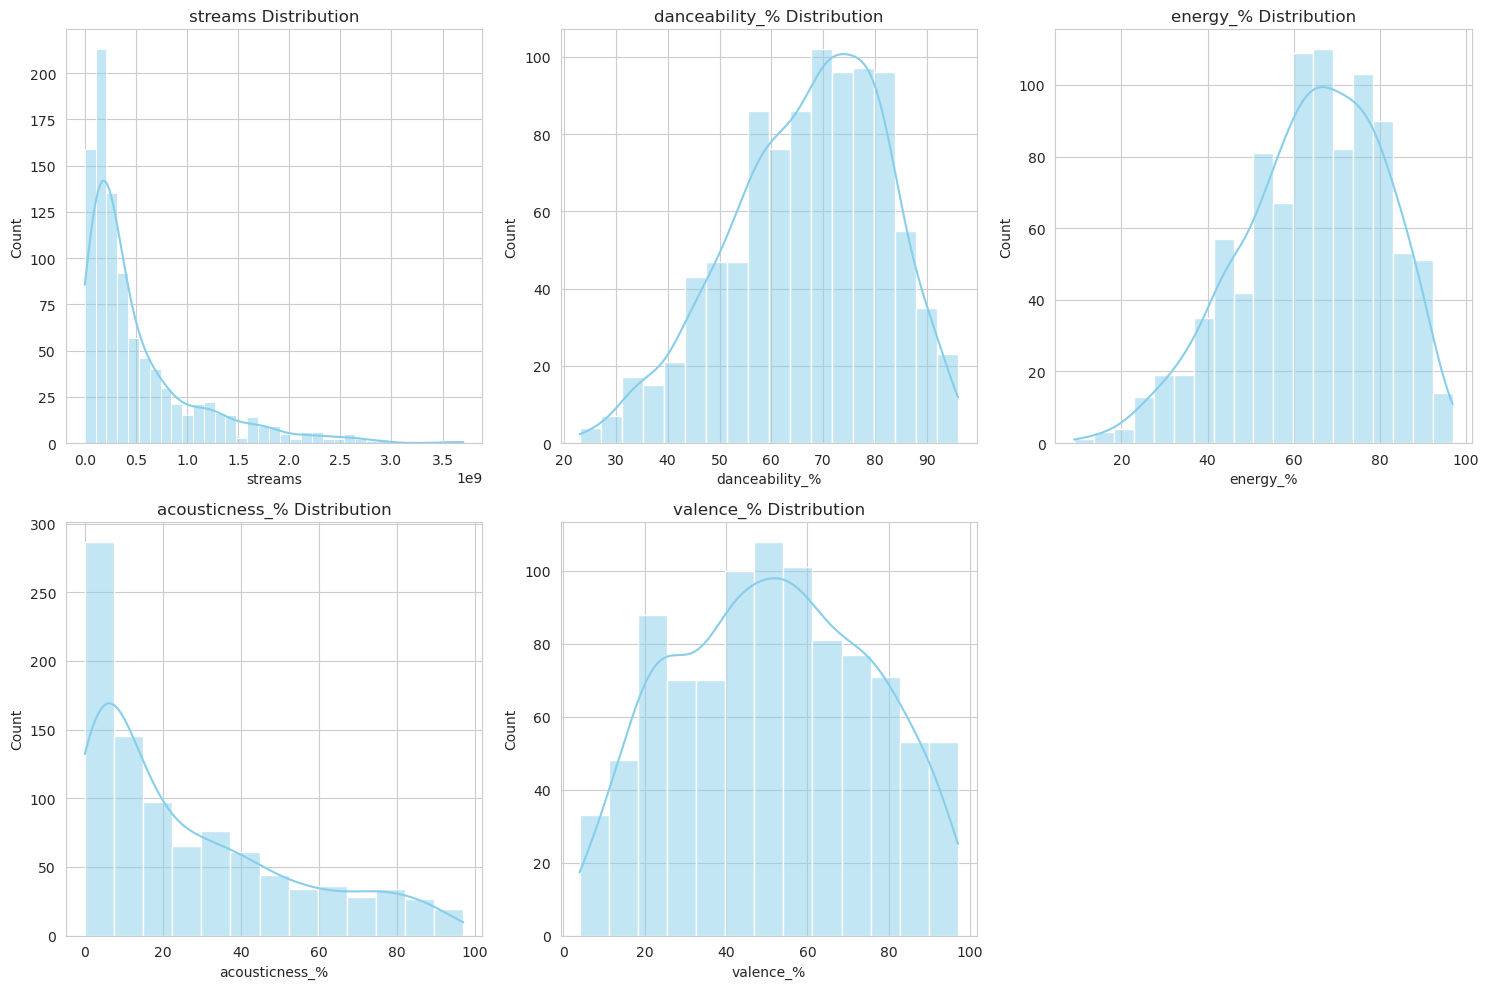

In [396]:
# Distribution of streams, danceability, energy, acoustics, valence
plt.figure(figsize=(15, 10))

for i, col in enumerate(['streams', 'danceability_%', 'energy_%', 'acousticness_%', 'valence_%'], start=1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'{col} Distribution')

plt.tight_layout()
plt.show()

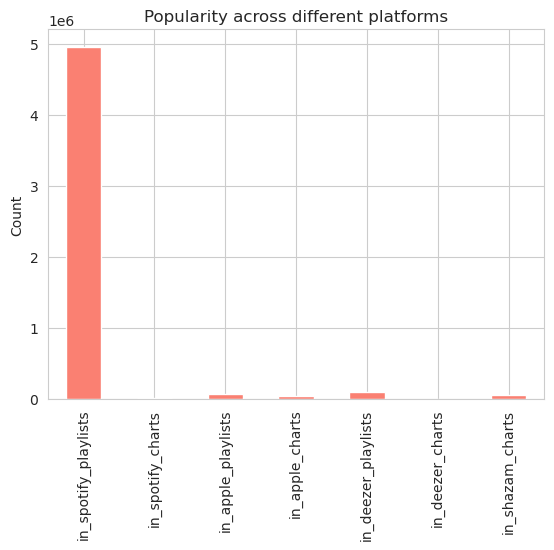

in_spotify_playlists    4955719.0
in_spotify_charts         11445.0
in_apple_playlists        64625.0
in_apple_charts           49469.0
in_deezer_playlists       95913.0
in_deezer_charts           2541.0
in_shazam_charts          56976.0
dtype: float64

In [397]:
# Popularity analysis
platform_cols = ['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts']
df[platform_cols].sum().plot(kind='bar', color='salmon')
plt.title('Popularity across different platforms')
plt.ylabel('Count')
plt.show()
df[platform_cols].sum()

#**Correlattion analysis**

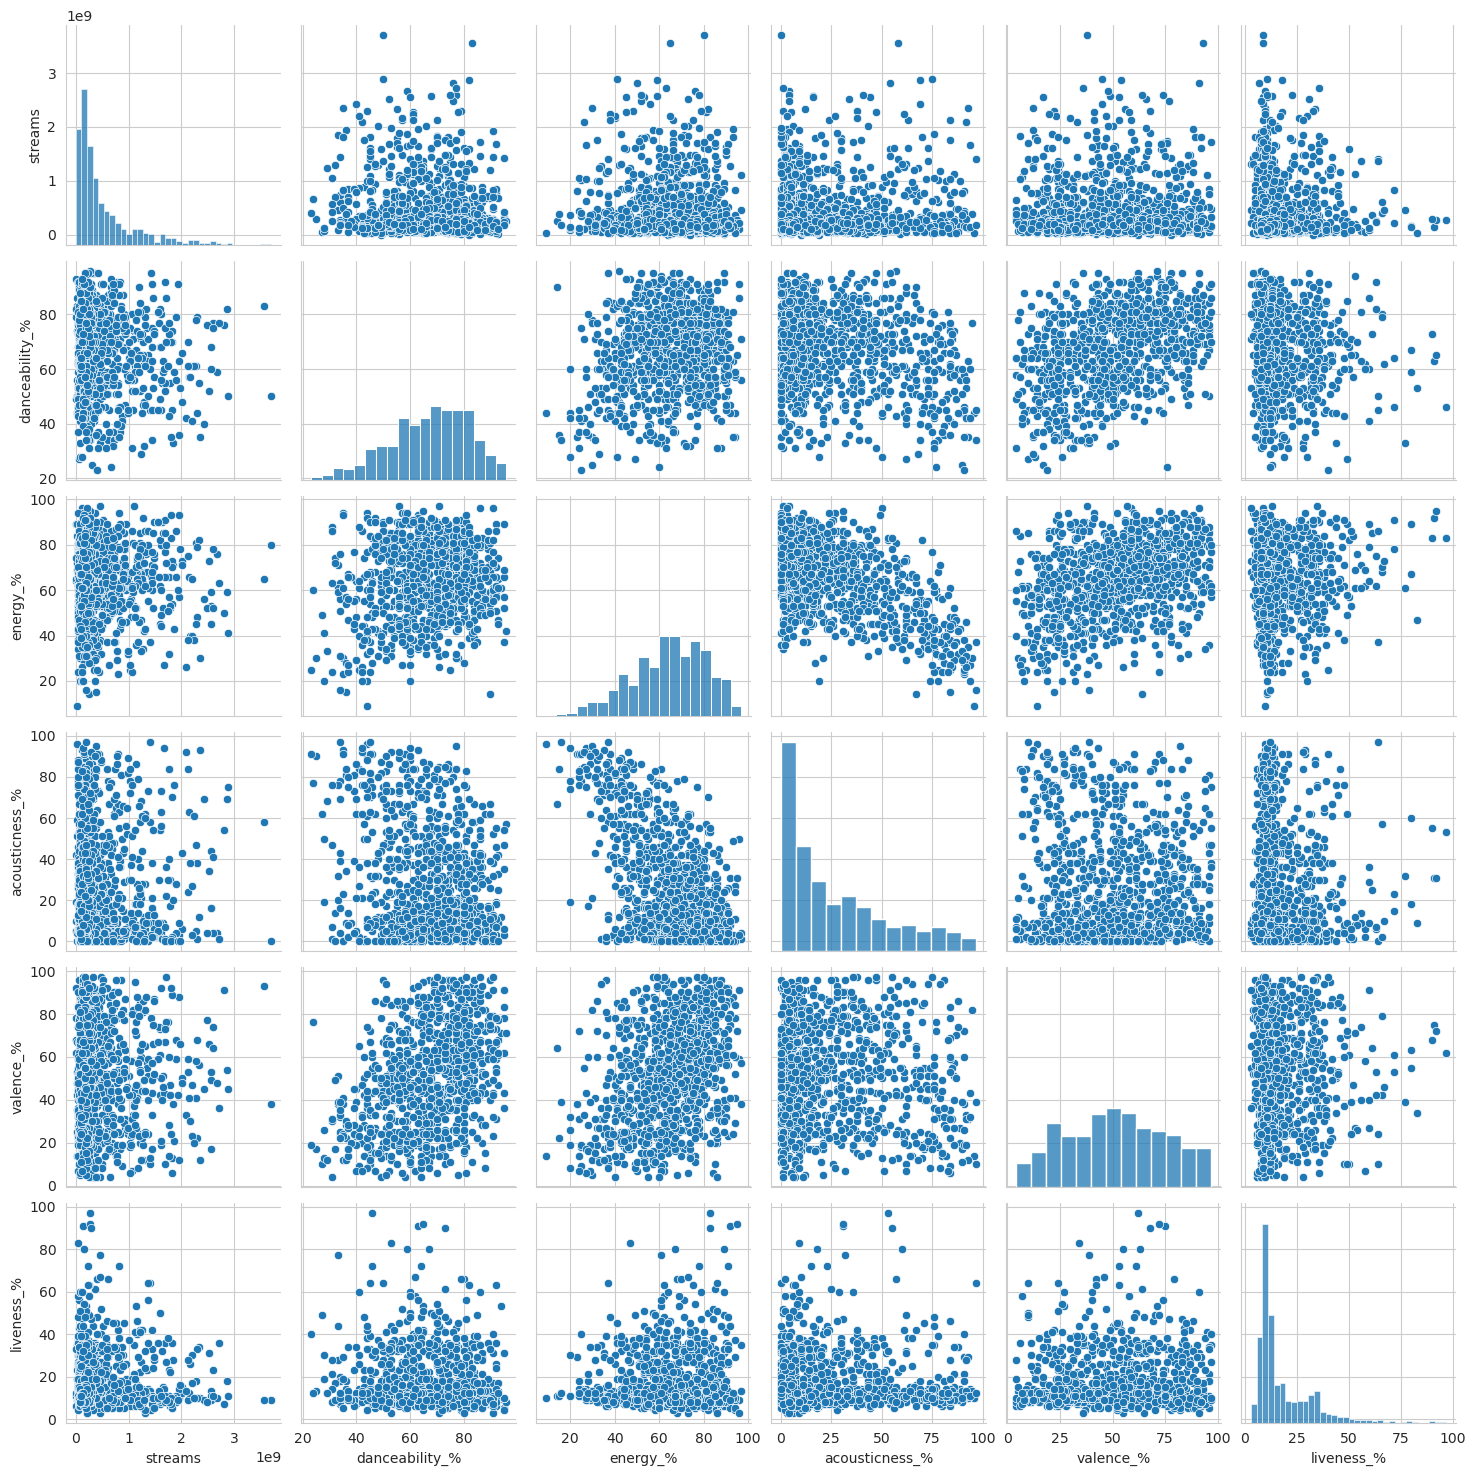

<Figure size 640x480 with 0 Axes>

In [398]:
# Pairplot fo rselected features
selected_features = ['streams', 'danceability_%', 'energy_%', 'acousticness_%', 'valence_%', 'liveness_%']
sns.pairplot(df[selected_features])
plt.show()
plt.savefig('correlation_analysis.png', format='png', dpi=300, bbox_inches='tight')

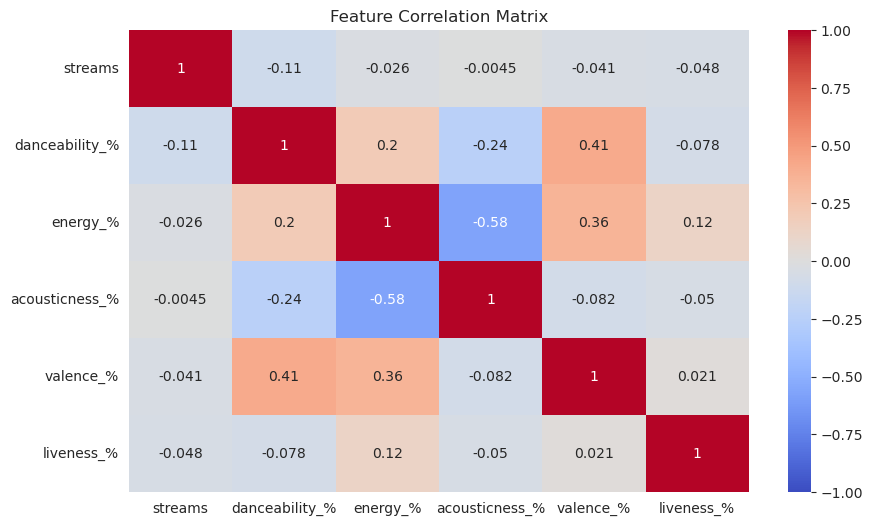

In [399]:
# Correlation heatmap
plt.figure(figsize = (10, 6))
sns.heatmap(df[selected_features].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Feature Correlation Matrix")
plt.show()

#**Temporal Analysis**

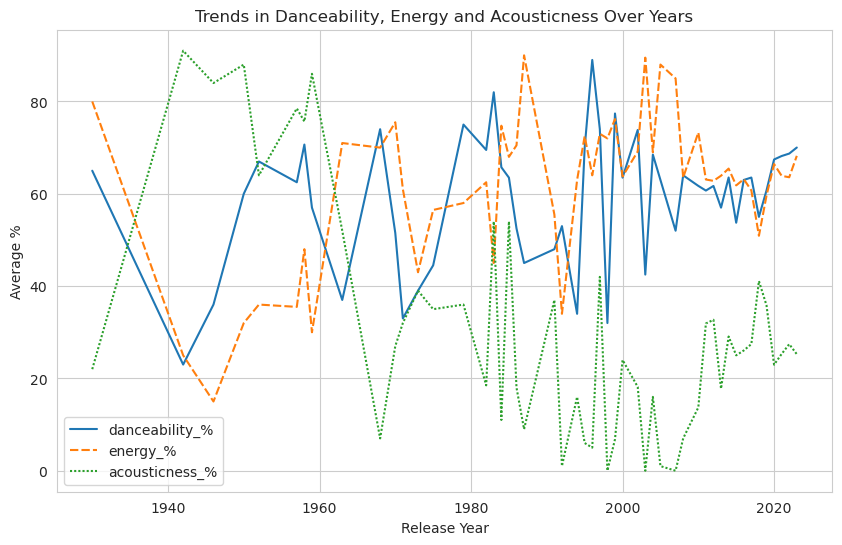

In [400]:
# Average danceability , energy adn acousticness by release year
df['release_year'] = df['released_date'].dt.year
yearly_means = df.groupby('release_year')[['danceability_%', 'energy_%', 'acousticness_%']].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_means)
plt.title("Trends in Danceability, Energy and Acousticness Over Years")
plt.xlabel("Release Year")
plt.ylabel("Average %")
plt.show()

*Analysing most streams and most songs*

In [403]:
df['streams'] = pd.to_numeric(df['streams'].astype(str).str.replace(',', ''), errors='coerce')

top_artists = df.groupby('artist(s)_name').agg(
    total_streams=('streams', 'sum'),
    song_count=('track_name', 'count')
).reset_index()

top_artists = top_artists.sort_values(by='total_streams', ascending=False)

top_artists.head(10)

,artist(s)_name,total_streams,song_count
572,The Weeknd,1.418555e+10,22
558,Taylor Swift,1.405366e+10,34
159,Ed Sheeran,1.390895e+10,9
223,Harry Styles,1.160865e+10,17
43,Bad Bunny,9.997800e+09,19
431,Olivia Rodrigo,7.442149e+09,7
171,Eminem,6.183806e+09,4
75,Bruno Mars,5.846921e+09,4
25,Arctic Monkeys,5.569807e+09,4
229,Imagine Dragons,5.272485e+09,3


# **Interpretation**
1. Evident reduction of acousticness over the years
2. Increase in both danceability and energy in songs
3. Most of the popular songs have a high valence, danceability and energey
4. Most popular songs have high acousticness
5. There is a subset of songs which are most streamed compared to others in the dataset
6. Strong non-linear correlation between energy adn acousticness
7. Strong linear relationship between danceability and valence

Done